In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_genetic.plots import plot_fitness_evolution

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
from sklearn_genetic import GAFeatureSelectionCV

/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-09 17:58:19.689247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 17:58:19.720334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 17:58:19.720358: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 17:58:19.720383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register facto

### Load Data

In [2]:
# load data
tr = np.loadtxt('../datasets/baseIAM/treino_baseIAM_301_Filter_1x1_new2.txt')
X_train = tr[:, 0 : -1]
y_train = tr[:, -1]

ts = np.loadtxt('../datasets/baseIAM/teste_baseIAM_301_Filter_1x1_new2.txt')
X_test  = ts[:, 0 : -1]
y_test  = ts[:, -1]

# Normaliza os dados...
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
def test_classifiers(X_train, X_test, y_train, y_test):
    ### k-NN
    clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('kNN', accuracy_score(y_test, y_pred))

    ### Decision Tree
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('DTC', accuracy_score(y_test, y_pred))

    ### SVM
    clf = SVC(probability=True, kernel='rbf')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('SVM', accuracy_score(y_test, y_pred))

    ### MLP
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('MLP', accuracy_score(y_test, y_pred))

    ### RFC
    clf = RandomForestClassifier(n_estimators=1000, max_depth=30)
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)
    print('RFC', accuracy_score(y_test, y_pred))

### Base Não Reduzida

In [4]:
test_classifiers(X_train, X_test, y_train, y_test)

kNN 0.6172757475083056
DTC 0.3023255813953488
SVM 0.706312292358804
MLP 0.6
RFC 0.7322259136212624


### Base Reduzida Com PCA

In [5]:
n_components = [16, 32, 64, 128, 256, 512]

for n in n_components:
    #build PCA
    pca = decomposition.PCA(n)
    pca.fit(X_train)

    #fit
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    #test
    print('------------------ PCA {n} ------------------')
    test_classifiers(X_train_pca, X_test_pca, y_train, y_test)
    print()

------------------ PCA {n} ------------------
kNN 0.5322259136212625
DTC 0.27109634551495015
SVM 0.5900332225913621


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.5687707641196014
RFC 0.6093023255813953

------------------ PCA {n} ------------------
kNN 0.5794019933554817
DTC 0.24518272425249169
SVM 0.6524916943521595


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.612624584717608
RFC 0.6724252491694352

------------------ PCA {n} ------------------
kNN 0.612624584717608
DTC 0.23322259136212625
SVM 0.6823920265780731


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.6013289036544851
RFC 0.7016611295681063

------------------ PCA {n} ------------------
kNN 0.6066445182724253
DTC 0.21993355481727575
SVM 0.692358803986711


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.6186046511627907
RFC 0.704983388704319

------------------ PCA {n} ------------------
kNN 0.6099667774086379
DTC 0.20863787375415282
SVM 0.695016611295681


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.6146179401993356
RFC 0.6724252491694352

------------------ PCA {n} ------------------
kNN 0.6112956810631229
DTC 0.1973421926910299
SVM 0.7043189368770764
MLP 0.5754152823920266
RFC 0.6485049833887043



### Base Reduzida Com AG

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.798789	0.00649973 	0.81137    	0.779993   
1  	100   	0.802732	0.00444994 	0.812108   	0.79402    
2  	100   	0.804629	0.00406578 	0.812108   	0.796604   
GA Accuracy: 0.7102990033222591


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


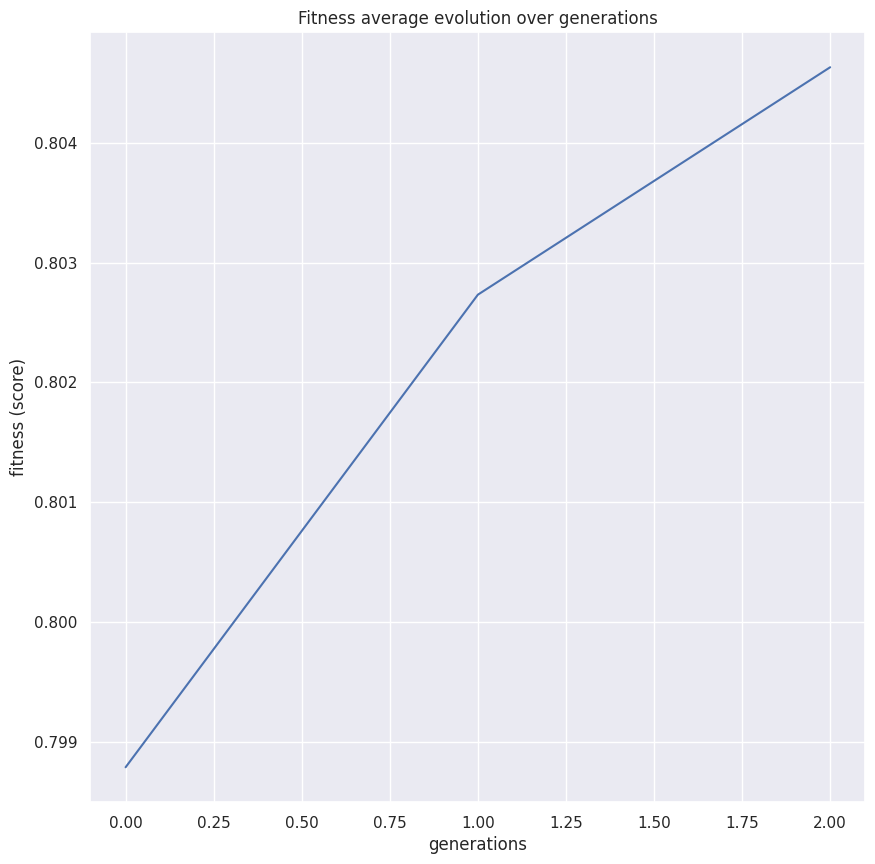

In [5]:
# clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf = SVC(probability=True, kernel='rbf')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=50,
    generations=2,
    n_jobs=-1,
    keep_top_k=5,
    elitism=True,
)

evolved_estimator.fit(X_train, y_train)

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
print('GA Accuracy:', accuracy_score(y_test, y_predict_ga))
    
#plot
plot_fitness_evolution(evolved_estimator)
# plt.savefig("genetico.png") 
plt.show()

In [6]:
X_train_ga = evolved_estimator.transform(X_train)
X_test_ga = evolved_estimator.transform(X_test)
print(X_train_ga.shape, X_test_ga.shape)

test_classifiers(X_train_ga, X_test_ga, y_train, y_test)

(2709, 571) (1505, 571)
kNN 0.5807308970099668
DTC 0.3016611295681063
SVM 0.7102990033222591


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 0.5581395348837209
RFC 0.7395348837209302


### Combinação de Classificadores

In [7]:
# Caracteristicas
X_tr, y_tr = X_train_ga, y_train
X_te, y_te = X_test_ga, y_test

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
svm = SVC(probability=True, kernel='rbf')
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20))
dtc = DecisionTreeClassifier()

# Regra da Soma
# voting = hard -> uses predicted class labels for majority rule voting
clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('mlp', mlp), ('dtc', dtc)], voting='hard')
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
print('SOMA', accuracy_score(y_te, y_pred))

# Regra do Maximo
# voting = soft -> predicts the class label based on the argmax of the sums of the predicted probabilities,
clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('mlp', mlp), ('dtc', dtc)], voting='soft')
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
print('MAXIMO', accuracy_score(y_te, y_pred))

# Regra do Produto

/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SOMA 0.6784053156146179


/home/zanoni/dev/inteligencia-computacional/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAXIMO 0.6059800664451828
